C:\Users\91897\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Recommended tip: 19.85%


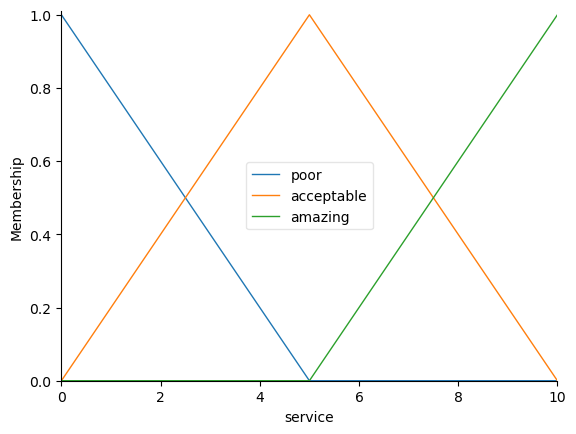

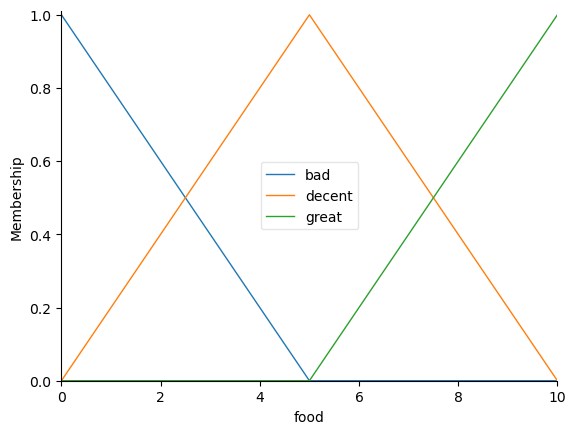

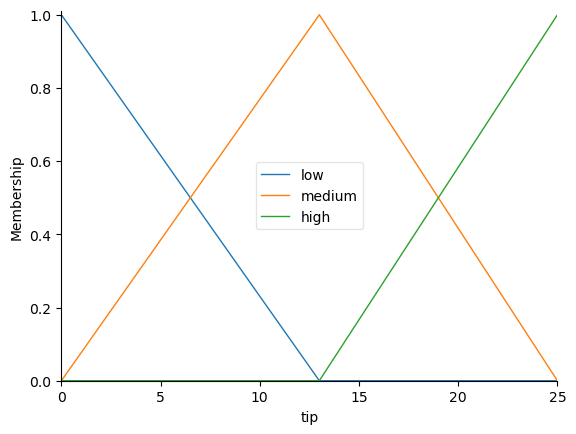

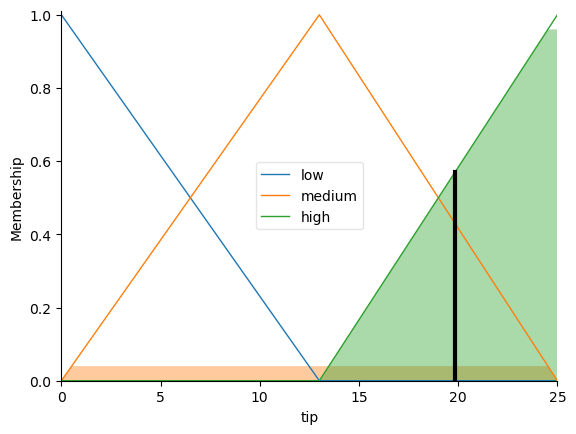

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent/Consequent objects hold universe variables and membership functions
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
service.automf(names=['poor', 'acceptable', 'amazing'])
food.automf(names=['bad', 'decent', 'great'])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# You can see how these look with .view()
service.view()
food.view()
tip.view()

rule1 = ctrl.Rule(service['amazing'] | food['great'], tip['high'])
rule2 = ctrl.Rule(service['acceptable'], tip['medium'])
rule3 = ctrl.Rule(service['poor'] & food['bad'], tip['low'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['service'] = 9.8
tipping.input['food'] = 6.5

# Crunch the numbers
tipping.compute()

print(f"Recommended tip: {tipping.output['tip']:.2f}%")
tip.view(sim=tipping)


Calculated Tip: 20.66


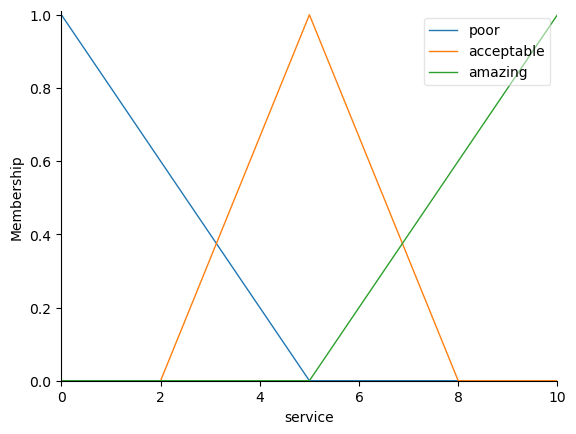

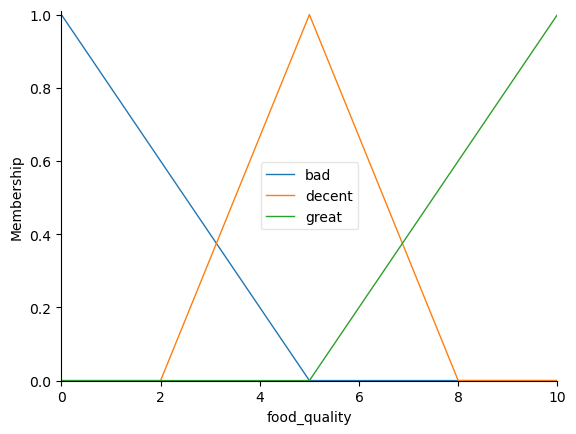

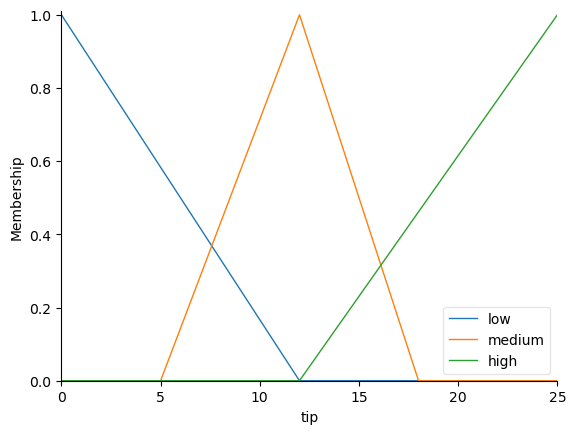

In [5]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Defining the universe of discourse for inputs and output
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Defining fuzzy sets for inputs and output
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['acceptable'] = fuzz.trimf(service.universe, [2, 5, 8])
service['amazing'] = fuzz.trimf(service.universe, [5, 10, 10])

food_quality['bad'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['decent'] = fuzz.trimf(food_quality.universe, [2, 5, 8])
food_quality['great'] = fuzz.trimf(food_quality.universe, [5, 10, 10])

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 12])
tip['medium'] = fuzz.trimf(tip.universe, [5, 12, 18])
tip['high'] = fuzz.trimf(tip.universe, [12, 25, 25])

# Defining the rules
rule1 = ctrl.Rule(service['amazing'] | food_quality['great'], tip['high'])
rule2 = ctrl.Rule(service['acceptable'], tip['medium'])
rule3 = ctrl.Rule(service['poor'] & food_quality['bad'], tip['low'])

# Creating the control system
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Creating the simulation
tipping_sim = ctrl.ControlSystemSimulation(tipping_ctrl)

# Providing input values
tipping_sim.input['service'] = 9.8
tipping_sim.input['food_quality'] = 6.5

# Running the simulation
tipping_sim.compute()

# Printing the calculated tip value
print("Calculated Tip:", tipping_sim.output['tip'])

# Visualizing the membership functions and the calculated result
service.view()
food_quality.view()
tip.view()

plt.show()
